
	Pearson's product-moment correlation

data:  log2(filtered_fpkm$Mock_g7g8_rna) and log2(filtered_fpkm$Mock_g7g8_ribo)
t = 200.82, df = 14846, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8505553 0.8592129
sample estimates:
      cor 
0.8549436 


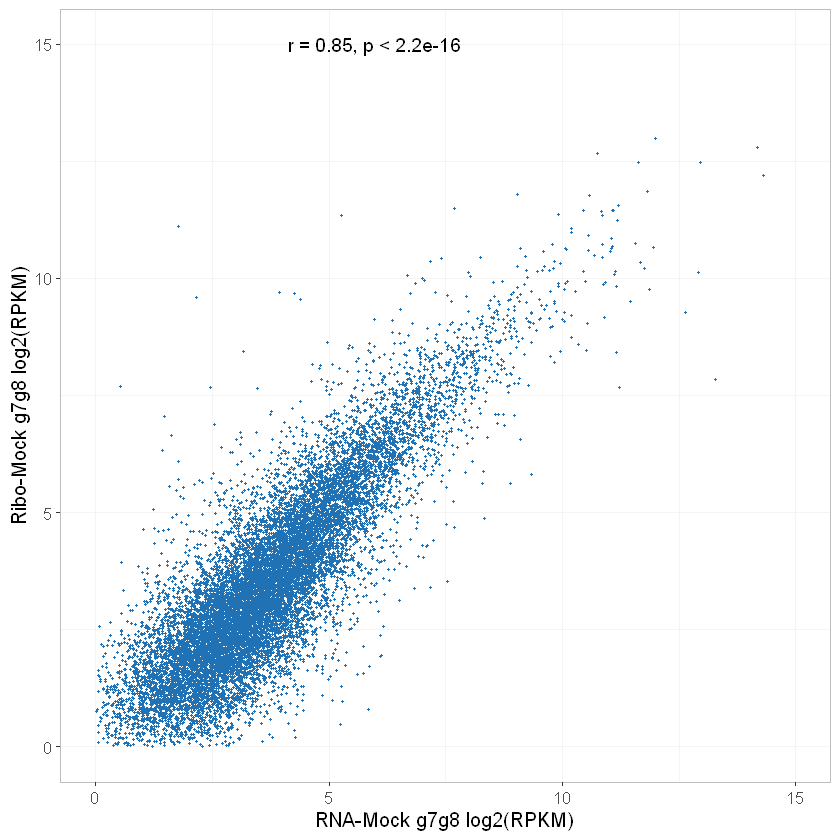

In [9]:
# Supplementary Fig. 6a

library(data.table)
library(ggplot2)

fpkm <- read.csv("data/fpkm_mean.txt",header=T,sep="\t",row.names=1)
#head(fpkm)

# filter 0
filtered_fpkm <- fpkm[fpkm$Mock_g7g8_rna > 0 & fpkm$Mock_g7g8_ribo > 0, ]
# calculate correlation
cor.test(log2(filtered_fpkm$Mock_g7g8_rna), log2(filtered_fpkm$Mock_g7g8_ribo))

#pdf("Sup_fig6_Mock_g7g8_RNA_Ribo_correlation.pdf",width = 2.7,height = 2.7)
ggplot(filtered_fpkm, aes(x = log2(Mock_g7g8_rna), y = log2(Mock_g7g8_ribo))) +
  geom_point(color="#2172b4",size=0.5) +
  xlim(0,15)+
  ylim(0,15)+
  xlab("RNA-Mock g7g8 log2(RPKM)") +
  ylab("Ribo-Mock g7g8 log2(RPKM)") +
  theme(panel.background = element_blank(),
        panel.border = element_rect(fill = NA,color = "grey"),
        panel.grid = element_line(color = "#f4f4f4"),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10))+
  annotate("text",x=6,y=15,label=c("r = 0.85, p < 2.2e-16"),size=4)
#dev.off()



	Pearson's product-moment correlation

data:  log2(filtered_fpkm$ABA_g7g8_rna) and log2(filtered_fpkm$ABA_g7g8_ribo)
t = 196.99, df = 14846, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8459476 0.8548512
sample estimates:
      cor 
0.8504603 


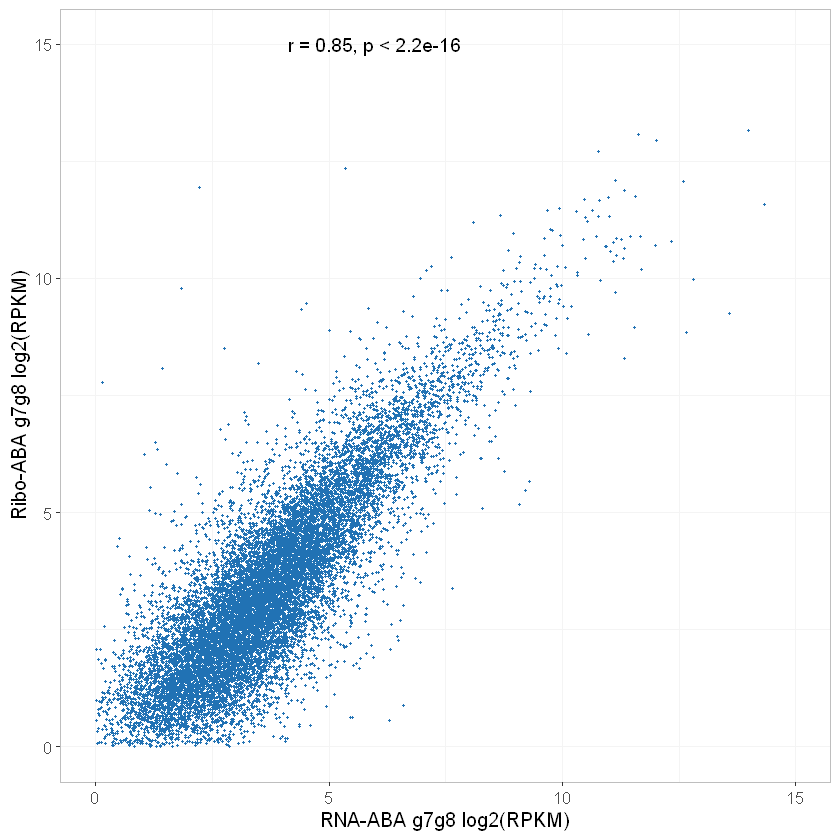

In [13]:
filtered_fpkm <- fpkm[fpkm$ABA_g7g8_rna > 0 & fpkm$ABA_g7g8_ribo > 0, ]
cor.test(log2(filtered_fpkm$ABA_g7g8_rna), log2(filtered_fpkm$ABA_g7g8_ribo))

#pdf("Sup_fig6_ABA_g7g8_RNA_Ribo_correlation.pdf",width = 2.7,height = 2.7)
ggplot(filtered_fpkm, aes(x = log2(ABA_g7g8_rna), y = log2(ABA_g7g8_ribo))) +
  geom_point(color="#2172b4",size=0.5) +
  xlim(0,15)+
  ylim(0,15)+
  xlab("RNA-ABA g7g8 log2(RPKM)") +
  ylab("Ribo-ABA g7g8 log2(RPKM)") +
  theme(panel.background = element_blank(),
        panel.border = element_rect(fill = NA,color = "grey"),
        panel.grid = element_line(color = "#f4f4f4"),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10))+
  annotate("text",x=6,y=15,label=c("r = 0.85, p < 2.2e-16"),size=4)
#dev.off()

[1] 4610

[1] 2337

[1] 2273

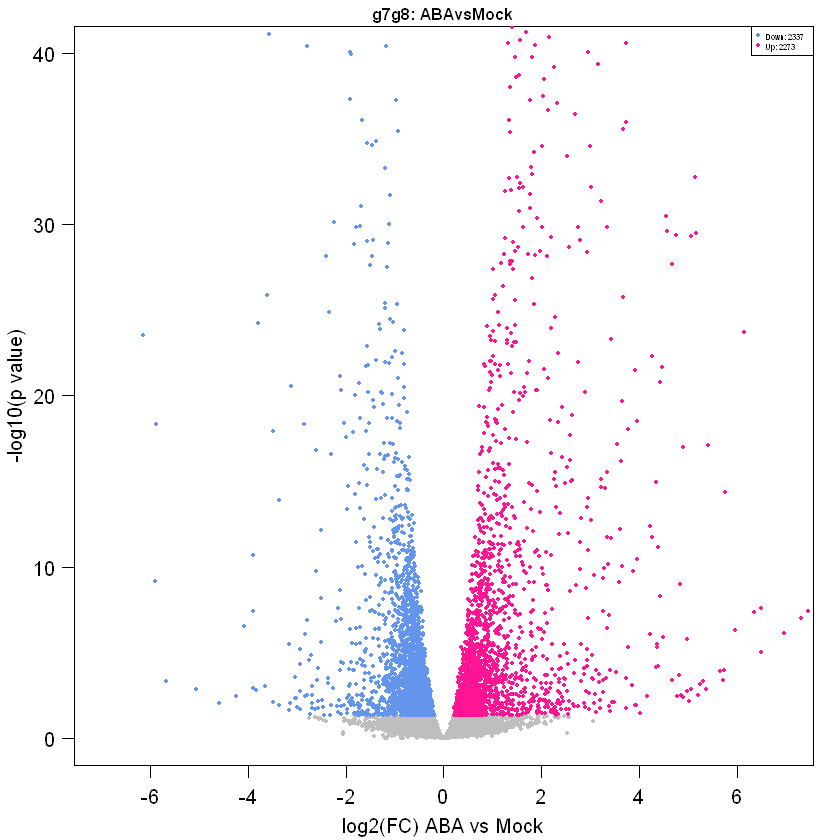

In [ ]:
# Supplementary Fig. 6b

g7g8_ABAvsMock = read.csv("data//RNA.rawcount.txt.ABA-g7g8_vs_Mock-g7g8.DESeq2.txt",header=T,sep="\t",row.names=1)

g7g8_ABAvsMock_sig = subset(g7g8_ABAvsMock,padj<0.05)
g7g8_ABAvsMock_sig_down = subset(g7g8_ABAvsMock_sig,log2FoldChange<0)
g7g8_ABAvsMock_sig_up = subset(g7g8_ABAvsMock_sig,log2FoldChange>0)

nrow(g7g8_ABAvsMock_sig)
nrow(g7g8_ABAvsMock_sig_down)
nrow(g7g8_ABAvsMock_sig_up)

### vacano plot for DEGs
#pdf("g7g8_ABAvsMock_DEGs_volcano_plot.pdf", width=5.5/2.54, height=5.5/2.54)
par(mar= c(3,3,1,1)+0.1,mgp = c(2,0.8,0),las=1,lwd=1)
plot((g7g8_ABAvsMock$log2FoldChange),-log10(g7g8_ABAvsMock$padj), ylab = "-log10(p value)", xlab = "log2(FC) ABA vs Mock", col = "gray",pch = 16,cex =0.4,ylim = c(0,40),xlim = c(-7,7),main = "g7g8: ABAvsMock",cex.main = 0.8)
points((g7g8_ABAvsMock_sig$log2FoldChange),-log10(g7g8_ABAvsMock_sig$padj),col = ifelse(g7g8_ABAvsMock_sig$log2FoldChange<0,"cornflowerblue","deeppink1"),pch = 16,cex =0.4)
legend("topright", legend = c("Down: 2337","Up: 2273"),pch = 16,col = c("cornflowerblue","deeppink1"),cex =0.4,bg = "white")
#dev.off()

[1] 2584

[1] 1116

[1] 1468

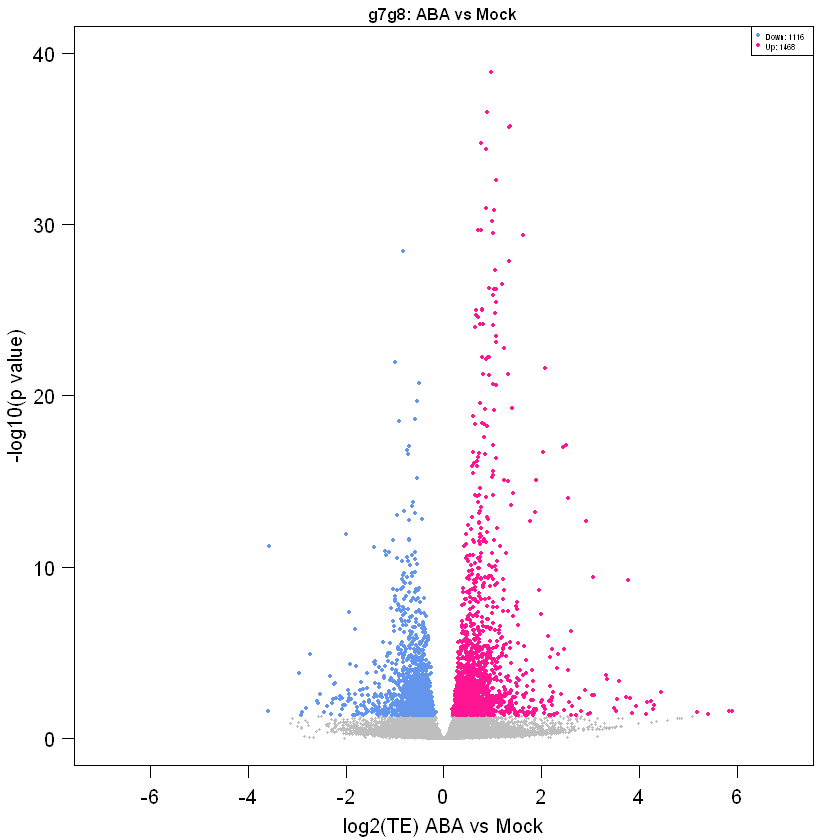

In [5]:
g7g8_ABAvsMock = read.csv("data//xtail_ABA_g7g8_vs_Mock_g7g8.txt",header=T,sep="\t",row.names=1)

g7g8_ABAvsMock_sig = subset(g7g8_ABAvsMock,pvalue.adjust<0.05)
g7g8_ABAvsMock_sig_down = subset(g7g8_ABAvsMock_sig,log2FC_TE_final<0)
g7g8_ABAvsMock_sig_up = subset(g7g8_ABAvsMock_sig,log2FC_TE_final>0)

nrow(g7g8_ABAvsMock_sig)
nrow(g7g8_ABAvsMock_sig_down)
nrow(g7g8_ABAvsMock_sig_up)

#pdf("g7g8_ABAvsMock_TE_volcano_plot.pdf", width=5.5/2.54, height=5.5/2.54)
par(mar= c(3,3,1,1)+0.1,mgp = c(2,0.8,0),las=1,lwd=1)
plot((g7g8_ABAvsMock$log2FC_TE_final),-log10(g7g8_ABAvsMock$pvalue.adjust), ylab = "-log10(p value)", xlab = "log2(TE) ABA vs Mock", col = "gray",pch = 16,cex =0.3,ylim = c(0,40),xlim = c(-7,7),main = "g7g8: ABA vs Mock",cex.main = 0.8)
points((g7g8_ABAvsMock_sig$log2FC_TE_final),-log10(g7g8_ABAvsMock_sig$pvalue.adjust),col = ifelse(g7g8_ABAvsMock_sig$log2FC_TE_final<0,"cornflowerblue","deeppink1"),pch = 16,cex =0.4)
legend("topright", legend = c("Down: 1116","Up: 1468"),pch = 16,col = c("cornflowerblue","deeppink1"),cex =0.4,bg = "white")
#dev.off()
